<a href="https://colab.research.google.com/github/RohaArslan/COMPUTERVISION/blob/main/identify_fruits%26corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
def identify_fruits(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    _, binary_image = cv2.threshold(blurred, 140, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((15, 15), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    fruits = compute_region_properties(cleaned_image)

    for fruit in fruits:
        area = fruit['area']
        circularity = fruit['circularity']
        # Debugging output
        print(f"Area: {area}, Circularity: {circularity}")

        label = ""


        if area > 50000:
            label = "Grapefruit"
        elif 20000 < area <= 50000 and circularity > 0.5:
            label = "Apple"
        elif area < 60000 and circularity < 0.3:
            label = "Corn"
        else:
            label = "Unknown"

        cv2.drawContours(image, [fruit['contour']], -1, (0, 255, 0), 2)
        cx, cy = fruit['centroid']
        cv2.putText(image, label, (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)

    return image  # Return the labeled image



Area: 42938.5, Circularity: 0.23253783648967666
Area: 29461.5, Circularity: 0.5959282999593362
Area: 88566.0, Circularity: 0.6126976001691721


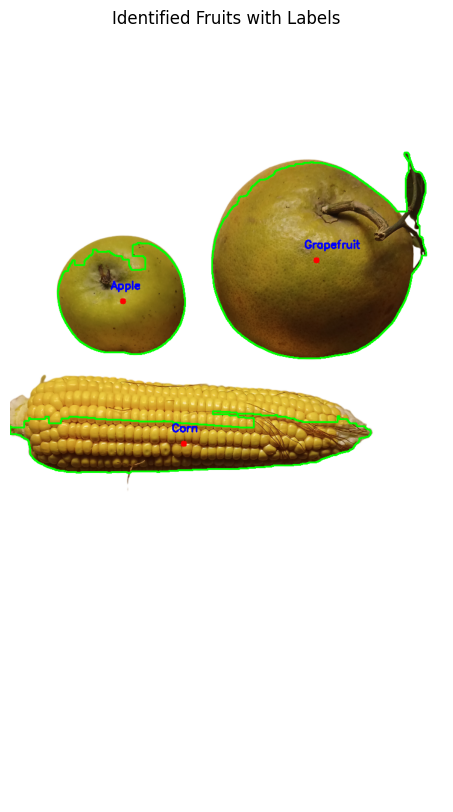

In [29]:

# Path to your image in Google Drive
image_path = '/content/drive/MyDrive/CV/fruits.png'

# Identify and label the fruits
labeled_image = identify_fruits(image_path)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title('Identified Fruits with Labels')
plt.axis('off')
plt.show()